<a href="https://colab.research.google.com/github/jmmzhng-pro/DSCI_632_Project/blob/main/Data_Acquisition_and_EDA_for_Stocks%2C_S_%26_P_500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Comment in and out as need
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os
import logging
import yfinance as yf

## Stock Data Acquisition

In [3]:
def download_stock_price(ticker='^GSPC', start_date='2008-01-01', end_date=None, path='/content/drive/MyDrive/'):
    """
    Downloads stock price data for a given ticker and time range, and saves it as a CSV file.

    Args:
        ticker (str): Stock ticker symbol.
        start_date (str): Start date for the data in YYYY-MM-DD format.
        end_date (str, optional): End date for the data in YYYY-MM-DD format. Defaults to None.
        path (str): Path to save the CSV file.

    Returns:
        pd.DataFrame: Data frame containing the stock price data.
    """
    try:
        stock_data = yf.Ticker(ticker).history(start=start_date, end=end_date)
        filename = f"{path}{ticker}.csv"
        stock_data.to_csv(filename)
        return stock_data
    except Exception as e:
        logging.error(f"Error downloading data for {ticker}: {e}")
        return None

In [4]:
#usage
mrk_data = download_stock_price('MRK')
if mrk_data is not None:
    print(mrk_data.head())

                                Open       High        Low      Close  \
Date                                                                    
2008-01-02 00:00:00-05:00  31.566227  31.761651  30.996244  31.142811   
2008-01-03 00:00:00-05:00  31.186235  31.452227  30.996241  31.115665   
2008-01-04 00:00:00-05:00  30.914821  31.186243  30.806254  30.860537   
2008-01-07 00:00:00-05:00  30.990834  31.712814  30.914837  31.441395   
2008-01-08 00:00:00-05:00  31.533656  32.945043  31.495656  32.385918   

                             Volume  Dividends  Stock Splits  
Date                                                          
2008-01-02 00:00:00-05:00  12287276        0.0           0.0  
2008-01-03 00:00:00-05:00   8831810        0.0           0.0  
2008-01-04 00:00:00-05:00  10469625        0.0           0.0  
2008-01-07 00:00:00-05:00  11874783        0.0           0.0  
2008-01-08 00:00:00-05:00  21523824        0.0           0.0  


In [5]:
# Check for missing values (unlikely but double check)
missing_values = mrk_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Handling missing values (if any)
# mrk_data.dropna(inplace=True) # To drop
# mrk_data.fillna(mrk_data.mean(), inplace=True) # To fill with mean


Missing values in each column:
 Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [ ]:
mrk_data.info

<bound method DataFrame.info of                                  Open        High         Low       Close  \
Date                                                                        
2008-01-02 00:00:00-05:00   31.566215   31.761639   30.996232   31.142799   
2008-01-03 00:00:00-05:00   31.186239   31.452231   30.996245   31.115669   
2008-01-04 00:00:00-05:00   30.914821   31.186243   30.806254   30.860537   
2008-01-07 00:00:00-05:00   30.990828   31.712808   30.914831   31.441389   
2008-01-08 00:00:00-05:00   31.533664   32.945051   31.495664   32.385925   
...                               ...         ...         ...         ...   
2023-11-14 00:00:00-05:00  102.660004  103.220001  101.900002  102.169998   
2023-11-15 00:00:00-05:00  101.879997  102.169998  100.720001  101.349998   
2023-11-16 00:00:00-05:00  101.830002  102.059998  101.029999  101.989998   
2023-11-17 00:00:00-05:00  102.000000  102.419998  100.959999  101.750000   
2023-11-20 00:00:00-05:00  100.970001  102.6

## Feature Engineering

In [7]:
# Calculate moving averages
mrk_data['MA_20'] = mrk_data['Close'].rolling(window=20).mean()
mrk_data['MA_50'] = mrk_data['Close'].rolling(window=50).mean()


In [8]:
# Get the day of the week and month
mrk_data['Day_of_Week'] = mrk_data.index.dayofweek
mrk_data['Month'] = mrk_data.index.month

In [9]:
#Price Change Indication
mrk_data['Price_Changes'] = mrk_data.apply(lambda row: 'Increase' if row['Close'] > row['Open'] else 'Decrease', axis=1 )

In [10]:
# Record any changes in Volume
mrk_data['Volume_Previous'] = mrk_data['Volume'].shift(1)
mrk_data['Volume_Change'] = (mrk_data['Volume'] - mrk_data['Volume_Previous']) / mrk_data['Volume_Previous']

In [11]:
# Market Volatility
mrk_data['Daily_Range'] = mrk_data['High'] - mrk_data['Low']

In [ ]:
import pandas as pd
import logging

In [ ]:
def download_s_and_p_500_data(path='/content/drive/MyDrive/'):
    """
    Downloads the current list of S&P 500 constituents from Wikipedia and saves it as a CSV file.

    Args:
        path (str): Path to save the CSV file.

    Returns:
        pd.DataFrame: Data frame w/list of S&P 500 constituents.
    """
    try:
        url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
        sp_500_data = pd.read_html(url, header=0)[0]
        filename = f"{path}constituents.csv"
        sp_500_data.to_csv(filename, index=False)
        return sp_500_data
    except Exception as e:
        logging.error(f"Error downloading S&P 500 constituents data: {e}")
        return None

In [ ]:
# Usage
sp_500_constituents = download_s_and_p_500_data()
if sp_500_constituents is not None:
    print(sp_500_constituents.head())

  Symbol     Security             GICS Sector               GICS Sub-Industry  \
0    MMM           3M             Industrials        Industrial Conglomerates   
1    AOS  A. O. Smith             Industrials               Building Products   
2    ABT       Abbott             Health Care           Health Care Equipment   
3   ABBV       AbbVie             Health Care                 Pharmaceuticals   
4    ACN    Accenture  Information Technology  IT Consulting & Other Services   

     Headquarters Location  Date added      CIK      Founded  
0    Saint Paul, Minnesota  1957-03-04    66740         1902  
1     Milwaukee, Wisconsin  2017-07-26    91142         1916  
2  North Chicago, Illinois  1957-03-04     1800         1888  
3  North Chicago, Illinois  2012-12-31  1551152  2013 (1888)  
4          Dublin, Ireland  2011-07-06  1467373         1989  


In [ ]:
# Download data for each S&P 500 constituent
sp500_price_data = {}
for symbol in sp_500_constituents['Symbol']:
    try:
        sp500_price_data[symbol] = download_stock_price(symbol)
    except Exception as e:
        print(f"Failed to download data for {symbol}: {e}")

ERROR:yfinance:BRK.B: No timezone found, symbol may be delisted
ERROR:yfinance:BF.B: No price data found, symbol may be delisted (1d 2008-01-01 -> 2023-11-20)


In [ ]:
# Download S&P 500 ETF data
spy_data = yf.Ticker('SPY').history(start='2008-01-01', end='2023-01-01')

In [ ]:
# Normalize the data
normalized_spy = spy_data['Close'] / spy_data['Close'].iloc[0]
normalized_aapl = sp500_price_data['AAPL']['Close'] / sp500_price_data['AAPL']['Close'].iloc[0]

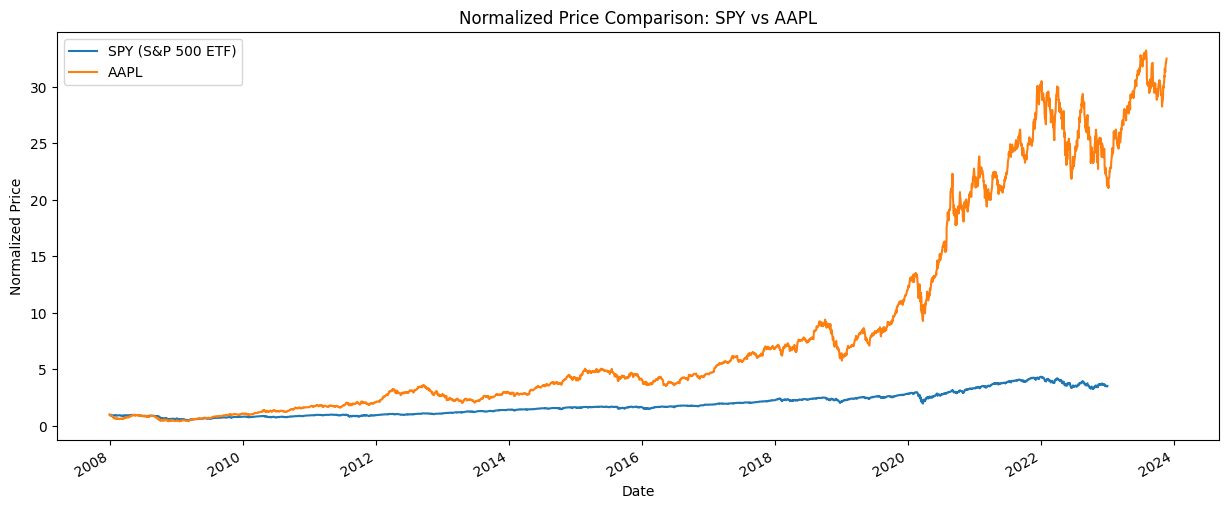

In [ ]:
# Plot a comparison with one of the stocks
plt.figure(figsize=(15, 6))
normalized_spy.plot(label='SPY (S&P 500 ETF)')
normalized_aapl.plot(label='AAPL')
plt.title('Normalized Price Comparison: SPY vs AAPL')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()


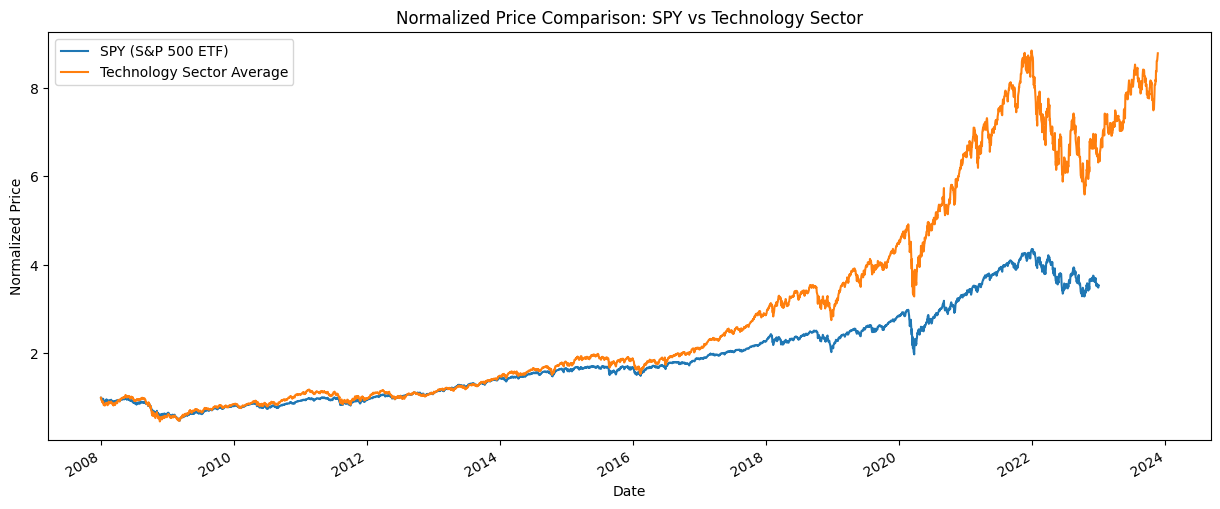

In [ ]:
# Let's try a sector wide comparison
# Aggregating data for the Technology sector
tech_stocks = sp_500_constituents[sp_500_constituents['GICS Sector'] == 'Information Technology']['Symbol']

tech_data = pd.DataFrame()
for symbol in tech_stocks:
    if symbol in sp500_price_data:
        tech_data[symbol] = sp500_price_data[symbol]['Close']

# Calculate the average price for the tech sector
tech_data['Average'] = tech_data.mean(axis=1)
normalized_tech = tech_data['Average'] / tech_data['Average'].iloc[0]

# Plot
plt.figure(figsize=(15, 6))
normalized_spy.plot(label='SPY (S&P 500 ETF)')
normalized_tech.plot(label='Technology Sector Average')
plt.title('Normalized Price Comparison: SPY vs Technology Sector')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()


##Time Series

In [13]:
import matplotlib.pyplot as plt

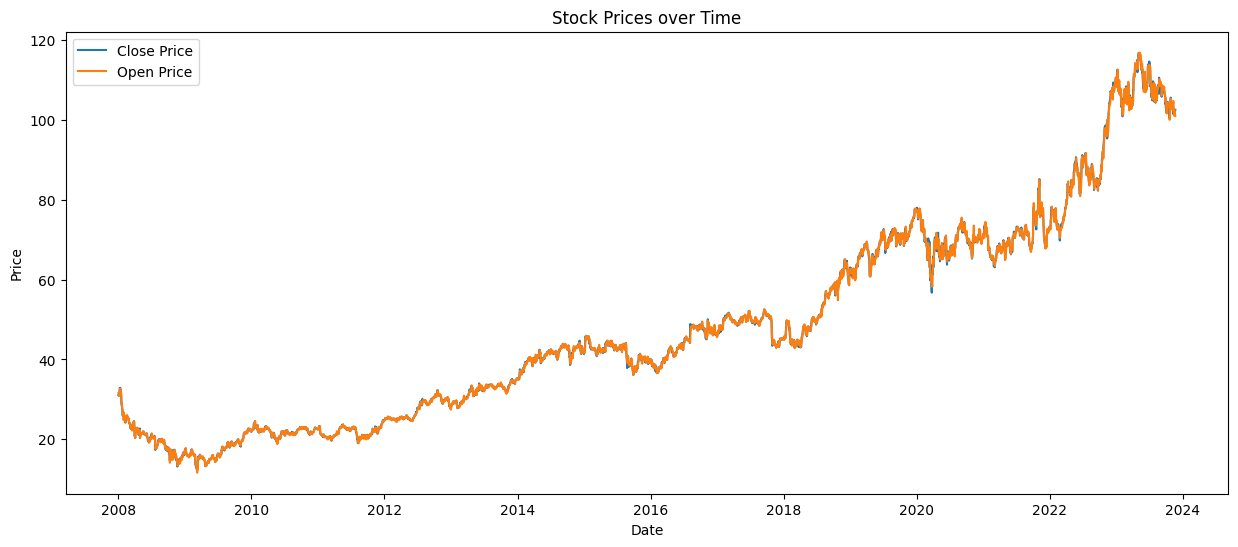

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(mrk_data['Close'], label='Close Price')
plt.plot(mrk_data['Open'], label='Open Price')
plt.title('Stock Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

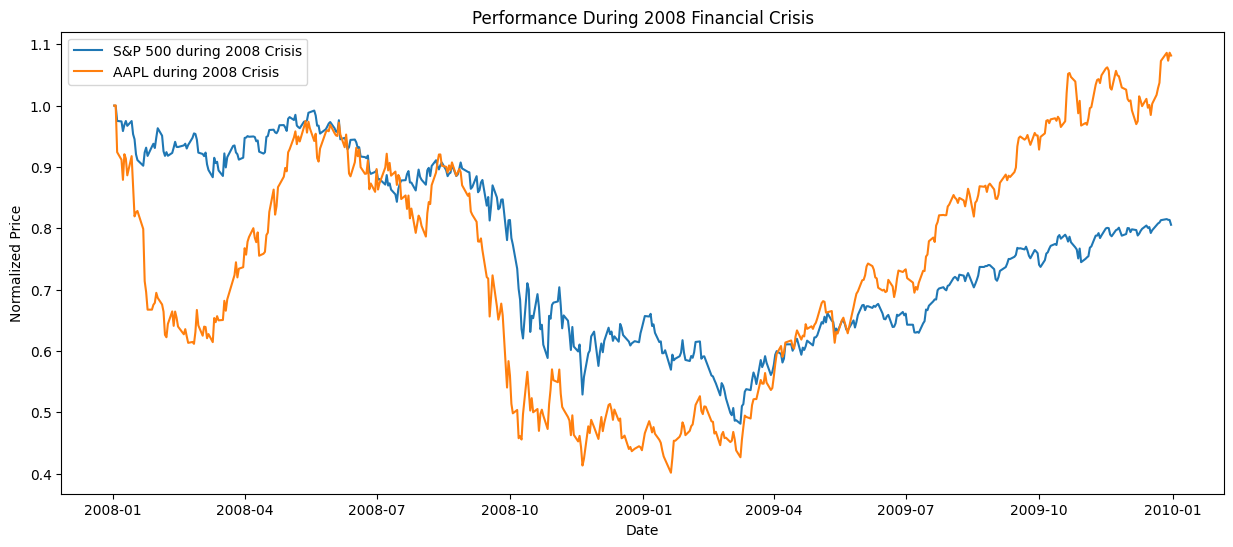

In [ ]:
# Define the crisis period
crisis_start = '2007-01-01'
crisis_end = '2009-12-31'

# SPY ETF during the crisis
spy_crisis = spy_data.loc[crisis_start:crisis_end]

#Apple (AAPL) during the crisis
aapl_crisis = sp500_price_data['AAPL'].loc[crisis_start:crisis_end]

# Plot
plt.figure(figsize=(15, 6))
plt.plot(spy_crisis['Close'] / spy_crisis['Close'].iloc[0], label='S&P 500 during 2008 Crisis')
plt.plot(aapl_crisis['Close'] / aapl_crisis['Close'].iloc[0], label='AAPL during 2008 Crisis')
plt.title('Performance During 2008 Financial Crisis')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

In [ ]:
# Define the pandemic period
pandemic_start = '2020-01-01'
pandemic_end = '2021-12-31'

In [ ]:
# SPY ETF during the pandemic
spy_pandemic = spy_data.loc[pandemic_start:pandemic_end]

#Apple (AAPL) during the pandemic
aapl_pandemic = sp500_price_data['AAPL'].loc[pandemic_start:pandemic_end]

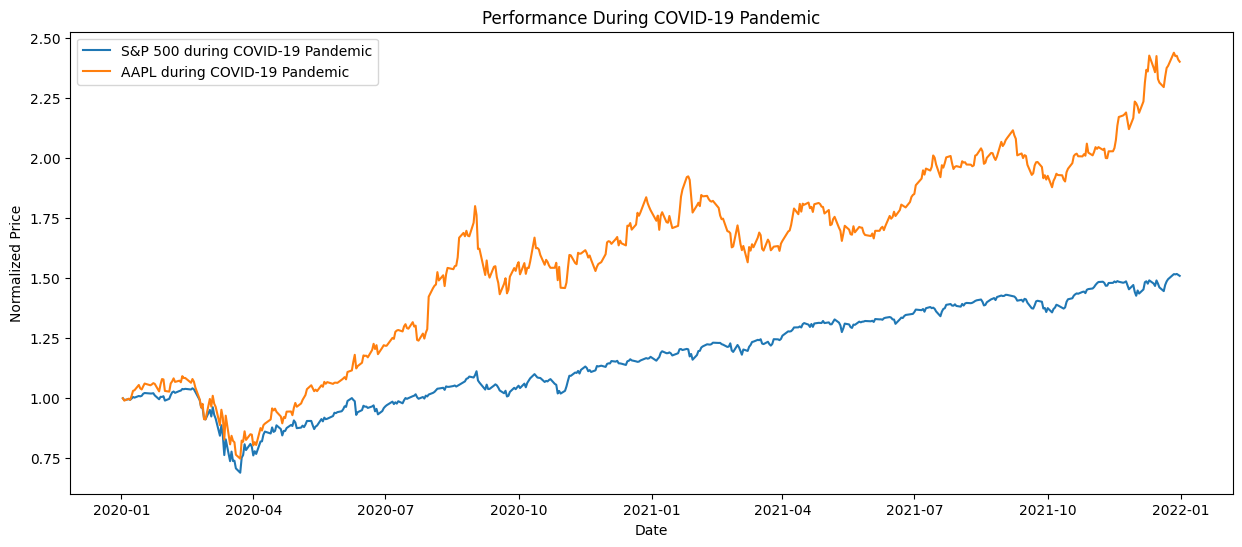

In [ ]:
# Plot
plt.figure(figsize=(15, 6))
plt.plot(spy_pandemic['Close'] / spy_pandemic['Close'].iloc[0], label='S&P 500 during COVID-19 Pandemic')
plt.plot(aapl_pandemic['Close'] / aapl_pandemic['Close'].iloc[0], label='AAPL during COVID-19 Pandemic')
plt.title('Performance During COVID-19 Pandemic')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()


In [ ]:
# Calculate daily returns for SPY and AAPL
spy_returns = spy_data['Close'].pct_change().dropna()
aapl_returns = sp500_price_data['AAPL']['Close'].pct_change().dropna()

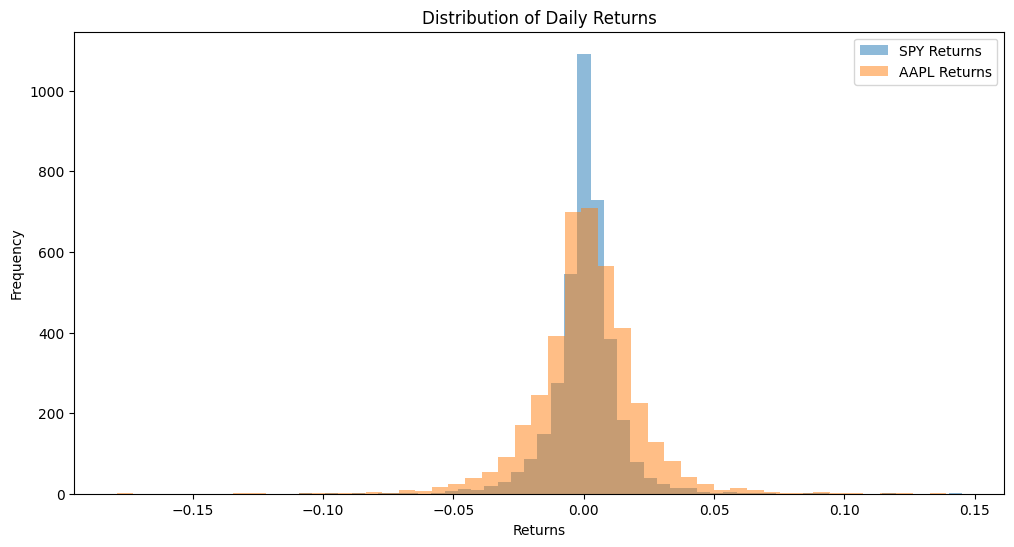

In [ ]:
# Plot
plt.figure(figsize=(12, 6))
plt.hist(spy_returns, bins=50, alpha=0.5, label='SPY Returns')
plt.hist(aapl_returns, bins=50, alpha=0.5, label='AAPL Returns')
plt.title('Distribution of Daily Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##Volume Traded over Time

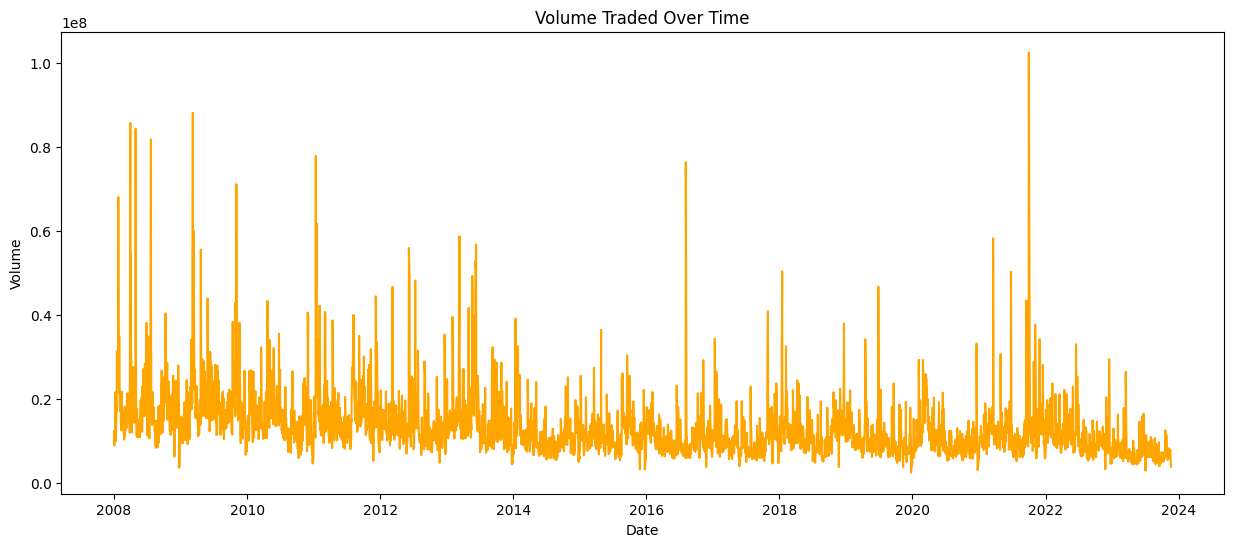

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(mrk_data['Volume'], color='orange')
plt.title('Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

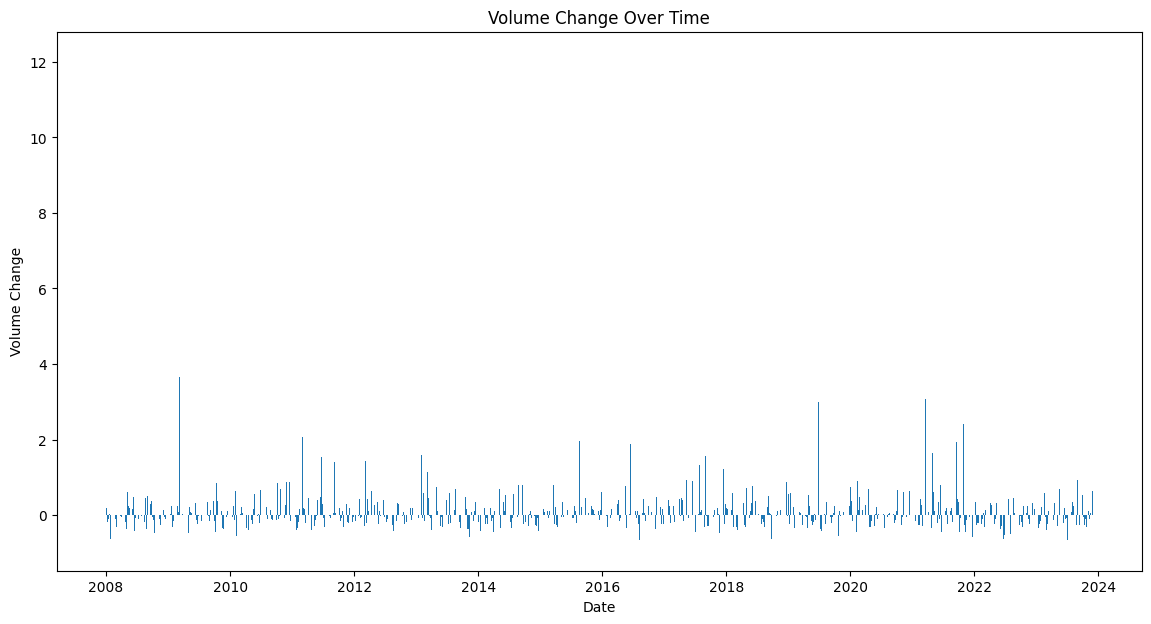

In [15]:
# Volume Change Plots
plt.figure(figsize=(14, 7))
plt.bar(mrk_data.index, mrk_data['Volume_Change'])
plt.title('Volume Change Over Time')
plt.ylabel('Volume Change')
plt.xlabel('Date')
plt.show()

##Moving Averages

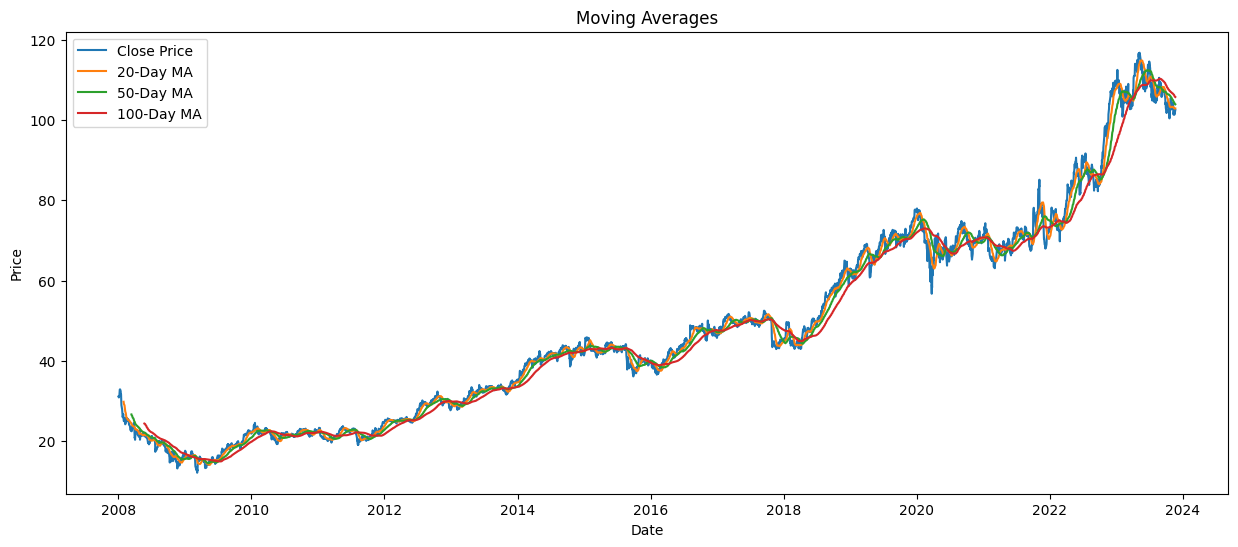

In [ ]:
# Moving Avg. for 20-day and 50-day Moving Average
mrk_data['MA20'] = mrk_data['Close'].rolling(window=20).mean()
mrk_data['MA50'] = mrk_data['Close'].rolling(window=50).mean()
mrk_data['MA100'] = mrk_data['Close'].rolling(window=100).mean()

plt.figure(figsize=(15, 6))
plt.plot(mrk_data['Close'], label='Close Price')
plt.plot(mrk_data['MA20'], label='20-Day MA')
plt.plot(mrk_data['MA50'], label='50-Day MA')
plt.plot(mrk_data['MA100'], label='100-Day MA')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

##Box Plots

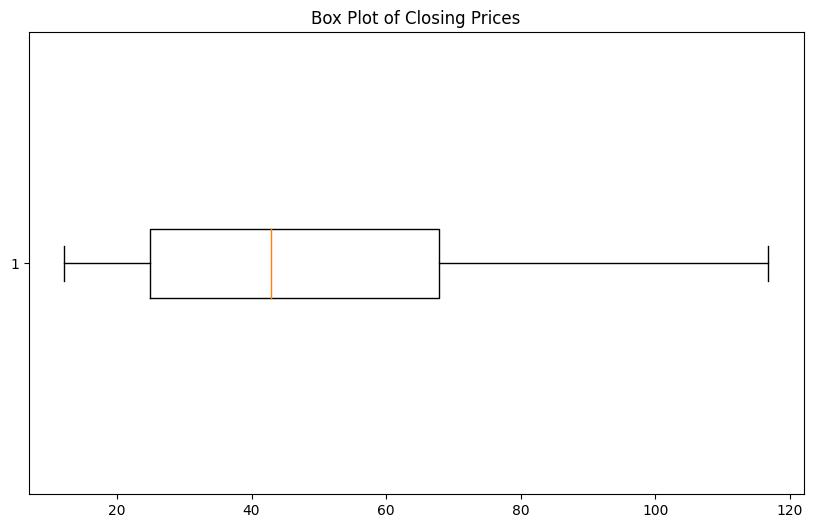

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(mrk_data['Close'], vert=False)
plt.title('Box Plot of Closing Prices')
plt.show()

##Histogram

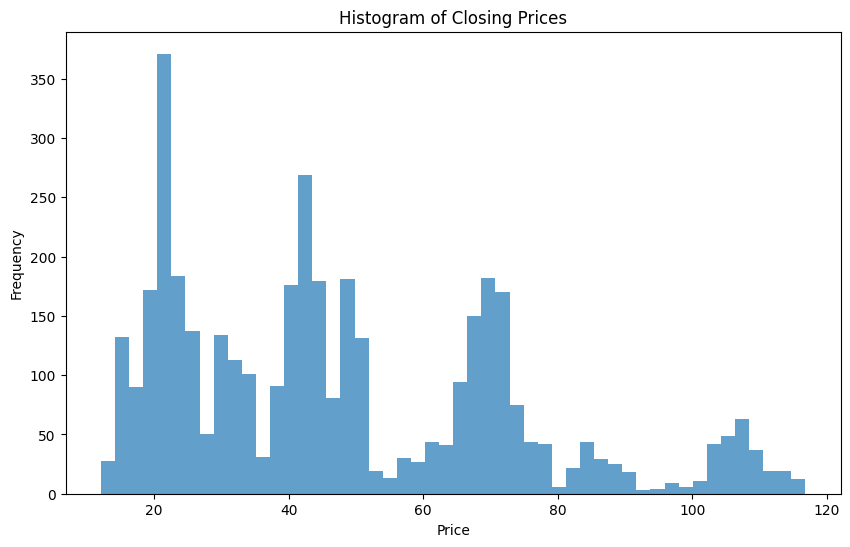

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(mrk_data['Close'], bins=50, alpha=0.7)
plt.title('Histogram of Closing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Correlation Matrix

In [18]:
import seaborn as sns

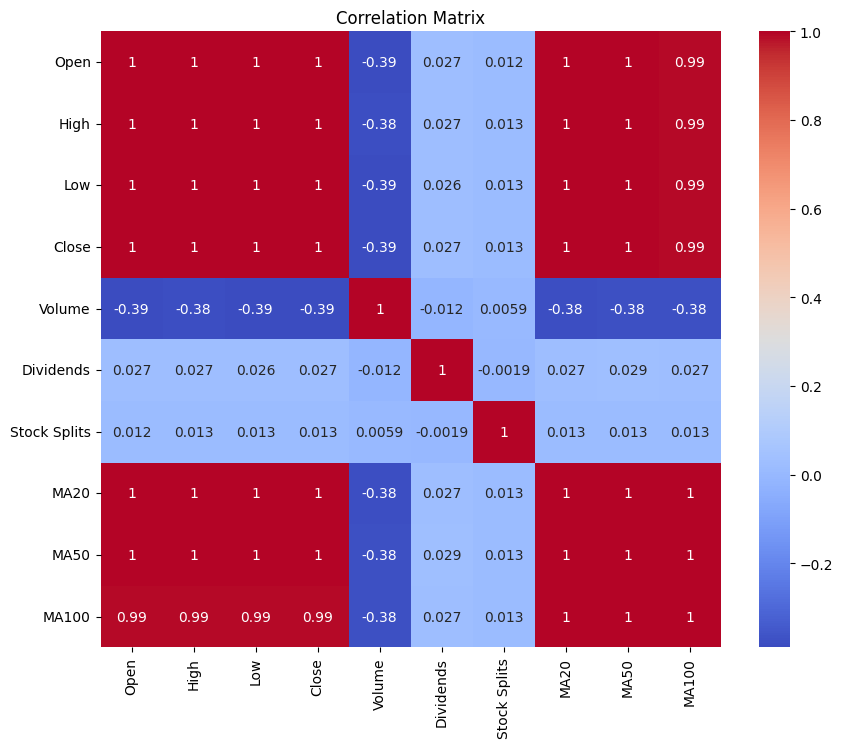

In [ ]:
correlation_matrix = mrk_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Calculate the correlation of any Stock (AAPL) with SPY
correlation_aapl_spy = spy_returns.corr(aapl_returns)
print("Correlation of AAPL with SPY:", correlation_aapl_spy)

Correlation of AAPL with SPY: 0.681499884459589


##Volatility Analysis

In [ ]:
# 30-day and 90-day rolling volatility
spy_data['30d_vol'] = spy_data['Close'].pct_change().rolling(window=30).std()
spy_data['90d_vol'] = spy_data['Close'].pct_change().rolling(window=90).std()

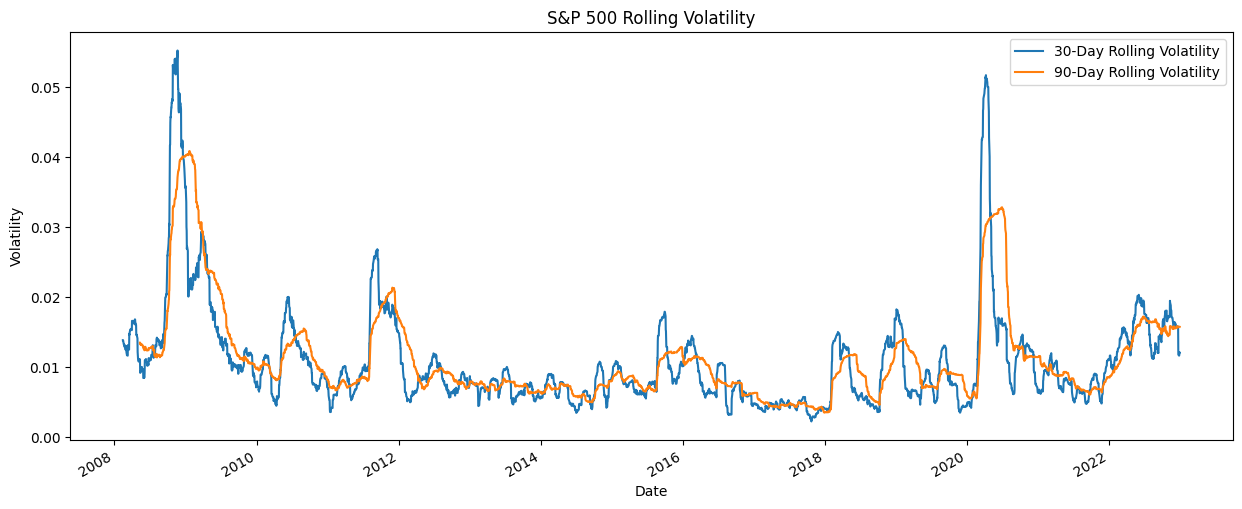

In [ ]:
# Plot
plt.figure(figsize=(15, 6))
spy_data['30d_vol'].plot(label='30-Day Rolling Volatility')
spy_data['90d_vol'].plot(label='90-Day Rolling Volatility')
plt.title('S&P 500 Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

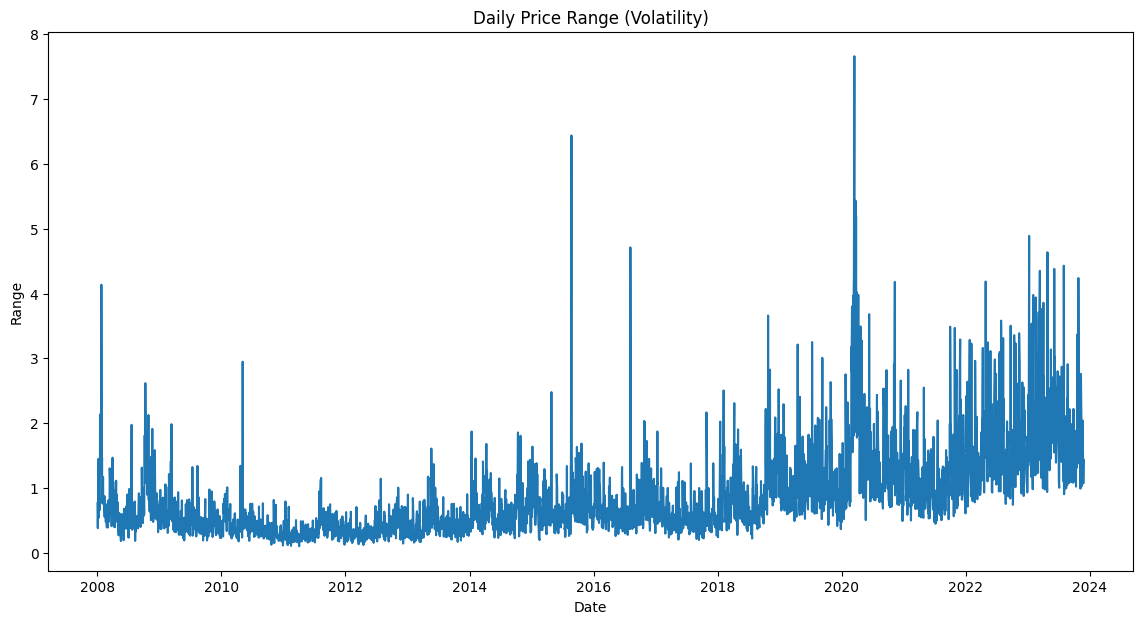

In [16]:
# Plotting Daily Range (Volatility)
plt.figure(figsize=(14, 7))
plt.plot(mrk_data['Daily_Range'])
plt.title('Daily Price Range (Volatility)')
plt.ylabel('Range')
plt.xlabel('Date')
plt.show()

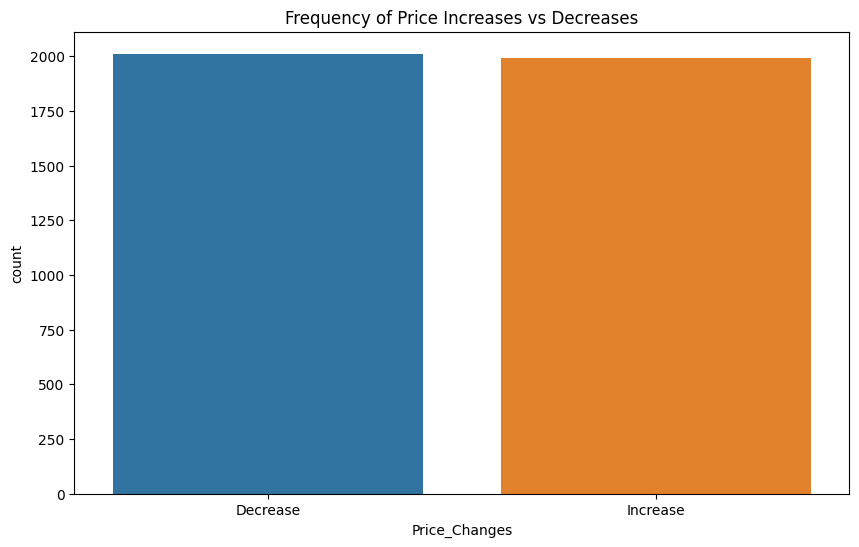

In [20]:
#Price Change Indicator
plt.figure(figsize=(10, 6))
sns.countplot(x='Price_Changes', data=mrk_data)
plt.title('Frequency of Price Increases vs Decreases')
plt.show()